In [14]:
import numpy as np
import os

In [15]:
path = os.path.realpath("GivenConnect.ipynb")
dir = os.path.dirname(path)
dir = dir.replace("arbors", "WCandCD")
os.chdir(dir)
%run GivenConnect.ipynb
dir = dir.replace("WCandCD", "arbors")
os.chdir(dir)

In [16]:
def calculateWC(plant):
    wc =0
    for edge in plant.edges():
        wc = wc + plant.edges[edge]['length']
    return(wc)
#takes networx arbor  
#returns calculates wiring cost

In [17]:
def calculateCD(plant):
    mainRootNodes =[]
    numOfLatRoots =0
    for node in plant.nodes():
        if plant.nodes[node]['label'] == 'main root':
            mainRootNodes.append(node)
        elif plant.nodes[node]['label'] == 'main root base':
            mainRootNodes.append(node)
        elif plant.nodes[node]['label'] == 'connection':
            if numOfLatRoots < plant.nodes[node]['root number']:
                numOfLatRoots = plant.nodes[node]['root number']
    cd =0
    for i in range (1, numOfLatRoots +1):
        cdForRoot =0
        for edge in plant.edges():
            if plant.edges[edge]['root number'] != i:
                continue
            cdForRoot += plant.edges[edge]['length']
        for node in plant.nodes():
            if plant.nodes[node]['label']!= 'connection':
                continue
            if plant.nodes[node]['root number'] == i:
                cx,cy = plant.nodes[node]['coordinate']
                break
        countMainRoot = False
        for j in range(0,len(mainRootNodes)-1):
            if countMainRoot:
                cdForRoot += plant[mainRootNodes[j]][mainRootNodes[j+1]]['length']
                continue
            m1x,m1y = plant.nodes[mainRootNodes[j]]['coordinate']
            m2x, m2y = plant.nodes[mainRootNodes[j+1]]['coordinate']
            if m1y <= cy:
                if m2y >= cy:
                    countMainRoot =True
                    length = np.sqrt((m2x -cx)**2 +(m2y-cy)**2)
                    cdForRoot += length
                    continue 
        cd +=cdForRoot
    return(cd)  
#takes networkx arbor
#returns conduction delay

original


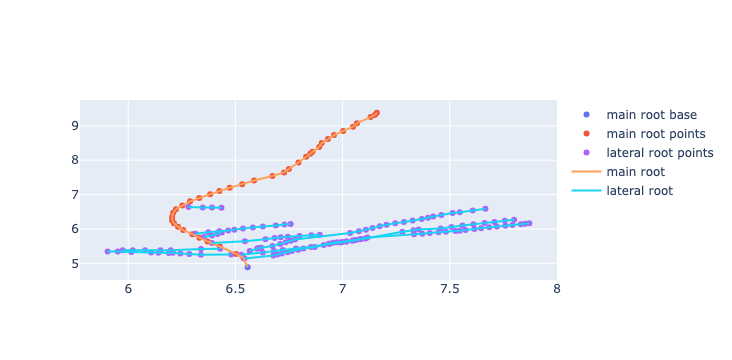

optimal given:  0   1


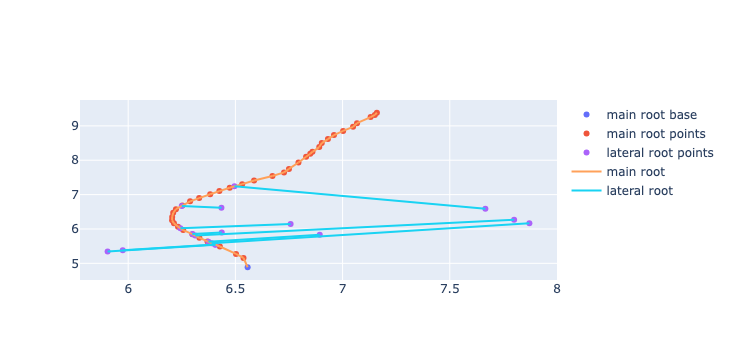

optimal and original super imposed given:  0 ,  1


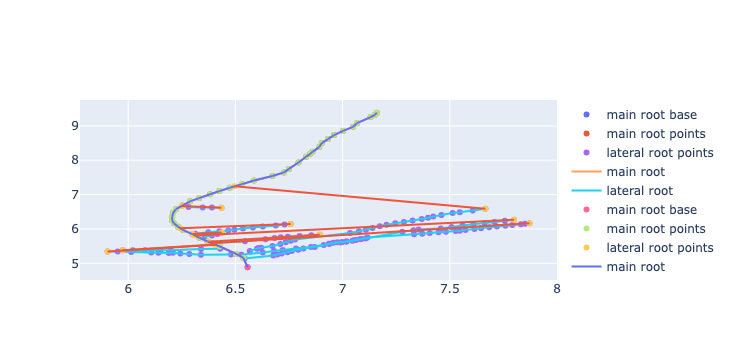

original


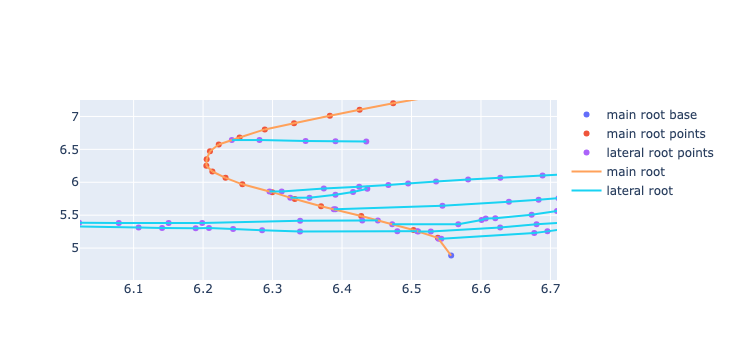

wiring cost:  12.471443678665112
conduction delaty:  43.760303260826326
